NumPy, short for Numerical Python, is one of the most important foundational packages
for numerical computing in Python. Most computational packages providing
scientific functionality use NumPy’s array objects as the lingua franca for data
exchange.      
              
Here are some of the things you’ll find in NumPy:

• ndarray, an efficient multidimensional array providing fast array-oriented arithmetic
operations and flexible broadcasting capabilities.        
• Mathematical functions for fast operations on entire arrays of data without having
to write loops.       
• Tools for reading/writing array data to disk and working with memory-mapped
files.         
• Linear algebra, random number generation, and Fourier transform capabilities.        
• A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

Because NumPy provides an easy-to-use C API, it is straightforward to pass data to
external libraries written in a low-level language and also for external libraries to
return data to Python as NumPy arrays. This feature has made Python a language of
choice for wrapping legacy C/C++/Fortran codebases and giving them a dynamic and
easy-to-use interface.

For most data analysis applications, the main areas of functionality I’ll focus on are:      
         
• Fast vectorized array operations for data munging and cleaning, subsetting and
filtering, transformation, and any other kinds of computations      
     
• Common array algorithms like sorting, unique, and set operations     
    
• Efficient descriptive statistics and aggregating/summarizing data       
• Data alignment and relational data manipulations for merging and joining
together heterogeneous datasets      
• Expressing conditional logic as array expressions instead of loops with if-elif-else
branches               
• Group-wise data manipulations (aggregation, transformation, function application)           

While NumPy provides a computational foundation for general numerical data processing,
many readers will want to use pandas as the basis for most kinds of statistics
or analytics, especially on tabular data. pandas also provides some more domain specific
functionality like time series manipulation, which is not present in NumPy.

One of the reasons NumPy is so important for numerical computations in Python is
because it is designed for efficiency on large arrays of data. There are a number of
reasons for this:      
          
• NumPy internally stores data in a contiguous block of memory, independent of
other built-in Python objects. NumPy’s library of algorithms written in the C language
can operate on this memory without any type checking or other overhead.
NumPy arrays also use much less memory than built-in Python sequences.       
   
• NumPy operations perform complex computations on entire arrays without the
need for Python for loops.        
       
       
To give you an idea of the performance difference, consider a NumPy array of one
million integers, and the equivalent Python list:       

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

In [4]:
my_arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

Now let’s multiply each sequence by 2:

In [6]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 31.3 ms


In [7]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 736 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their
pure Python counterparts and use significantly less memory.

## 4.1 The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray,
which is a fast, flexible container for large datasets in Python. Arrays enable you to
perform mathematical operations on whole blocks of data using similar syntax to the
equivalent operations between scalar elements.       
        
To give you a flavor of how NumPy enables batch computations with similar syntax
to scalar values on built-in Python objects, I first import NumPy and generate a small
array of random data:

In [8]:
import numpy as np

In [9]:
# Generate some random data
data = np.random.randn(2, 3)

In [10]:
data

array([[ 0.26310286,  0.11471669, -1.76153525],
       [ 0.51692286, -1.13179296,  0.73616062]])

In [11]:
data * 10

array([[  2.63102856,   1.14716693, -17.61535252],
       [  5.16922855, -11.31792962,   7.36160615]])

In [12]:
data + data

array([[ 0.52620571,  0.22943339, -3.5230705 ],
       [ 1.03384571, -2.26358592,  1.47232123]])

In this chapter and throughout the book, I use the standard
NumPy convention of always using import numpy as np. You are,
of course, welcome to put from numpy import * in your code to
avoid having to write np., but I advise against making a habit of
this. The numpy namespace is large and contains a number of functions
whose names conflict with built-in Python functions (like min
and max).

An ndarray is a generic multidimensional container for homogeneous data; that is, all
of the elements must be the same type. Every array has a shape, a tuple indicating the
size of each dimension, and a dtype, an object describing the data type of the array:

In [13]:
data.shape

(2, 3)

In [14]:
data.dtype

dtype('float64')

### Creating ndarrays

The easiest way to create an array is to use the array function. This accepts any
sequence-like object (including other arrays) and produces a new NumPy array containing
the passed data. For example, a list is a good candidate for conversion:

In [15]:
data1 = [6, 7.5, 8, 0, 1]

In [16]:
arr1 = np.array(data1)

In [17]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional
array:

In [18]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [19]:
arr2.ndim

2

In [20]:
arr2.shape

(2, 4)

The data type is stored in a special dtype metadata
object;

In [21]:
arr2.dtype

dtype('int32')

In addition to np.array, there are a number of other functions for creating new
arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a
given length or shape. empty creates an array without initializing its values to any particular
value. To create a higher dimensional array with these methods, pass a tuple
for the shape:

In [22]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [24]:
np.empty((2, 3, 2))

array([[[1.12851866e-311, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 1.12969110e-042]],

       [[1.22198695e+161, 1.10596430e-046],
        [2.17536833e-076, 9.15688378e-071],
        [1.08628353e-071, 7.87220490e-067]]])

It’s not safe to assume that np.empty will return an array of all
zeros. In some cases, it may return uninitialized “garbage” values.

arange is an array-valued version of the built-in Python range function:

In [25]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

See Table 4-1 for a short list of standard array creation functions. Since NumPy is
focused on numerical computing, the data type, if not specified, will in many cases be
float64 (floating point).

array ==> Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype
or explicitly specifying a dtype; copies the input data by default     
     
asarray ==> Convert input to ndarray, but do not copy if the input is already an ndarray     
     
arange ==> Like the built-in range but returns an ndarray instead of a list     
     
ones,ones_like ==> Produce an array of all 1s with the given shape and dtype; ones_like takes another array and
produces a ones array of the same shape and dtype      
    
zeros, zeros_like ==> Like ones and ones_like but producing arrays of 0s instead      
      
empty,empty_like ==> Create new arrays by allocating new memory, but do not populate with any values like ones and
zeros      
        
full, full_like ==> Produce an array of the given shape and dtype with all values set to the indicated “fill value”
full_like takes another array and produces a filled array of the same shape and dtype
eye,   
   
identity Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)

### Data Types for ndarrays

The data type or dtype is a special object containing the information (or metadata,
data about data) the ndarray needs to interpret a chunk of memory as a particular
type of data:

In [26]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

A standard doubleprecision
floating-point value (what’s used under the hood in Python’s float object)
takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64.

In [27]:
# int8, uint8 ==> i1, u1 ==> Signed and unsigned 8-bit (1 byte) integer types
# int16, uint16 ==> i2, u2 ==> Signed and unsigned 16-bit integer types
# int32, uint32 ==> i4, u4 ==> Signed and unsigned 32-bit integer types
# int64, uint64 ==> i8, u8 ==> Signed and unsigned 64-bit integer types
# float16 ==> f2 ==> Half-precision floating point
# float32 ==> f4 or f ==> Standard single-precision floating point; compatible with C float
# float64 ==> f8 or d ==> Standard double-precision floating point; compatible with C double and
# Python float object
# float128 ==> f16 or g ==> Extended-precision floating point
# bool ==> ? ==> Boolean type storing True and False values
# complex64,complex128,complex25 ==> c8, c16,c32 ==> Complex numbers represented by two 32, 64, or 128 floats, respectively
# object ==> O ==> Python object type; a value can be any Python object
# string_ ==> S ==> Fixed-length ASCII string type (1 byte per character); for example, to create a
# string dtype with length 10, use 'S10'
# unicode_ ==> U ==> Fixed-length Unicode type (number of bytes platform specific); same
# specification semantics as string_ (e.g., 'U10')

You can explicitly convert or cast an array from one dtype to another using ndarray’s
astype method:

In [28]:
arr = np.array([1, 2, 3, 4, 5])

In [32]:
arr

array([1, 2, 3, 4, 5])

In [29]:
arr.dtype

dtype('int32')

In [30]:
float_arr = arr.astype(np.float64)

In [31]:
float_arr

array([1., 2., 3., 4., 5.])

In this example, integers were cast to floating point. If I cast some floating-point
numbers to be of integer dtype, the decimal part will be truncated:

In [33]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [34]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

If you have an array of strings representing numbers, you can use astype to convert
them to numeric form:

In [35]:
 numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [36]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

It’s important to be cautious when using the numpy.string_ type,
as string data in NumPy is fixed size and may truncate input
without warning. pandas has more intuitive out-of-the-box behavior on non-numeric data

If casting were to fail for some reason (like a string that cannot be converted to
float64), a ValueError will be raised. Here I was a bit lazy and wrote float instead
of np.float64; NumPy aliases the Python types to its own equivalent data dtypes.      
      
You can also use another array’s dtype attribute:


In [37]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [38]:
 int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a dtype:

In [39]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

Calling astype always creates a new array (a copy of the data), even
if the new dtype is the same as the old dtype.

## Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data
without writing any for loops. NumPy users call this vectorization. Any arithmetic
operations between equal-size arrays applies the operation element-wise:

In [40]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [41]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [42]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in
the array:

In [43]:
 1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [44]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [45]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [46]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Operations between differently sized arrays is called broadcasting

## Basic Indexing and Slicing

NumPy array indexing is a rich topic, as there are many ways you may want to select
a subset of your data or individual elements. One-dimensional arrays are simple; on
the surface they act similarly to Python lists:

In [47]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
arr[5]

5

In [49]:
arr[5:8]

array([5, 6, 7])

In [50]:
arr[5:8] = 12

In [51]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is
propagated (or broadcasted henceforth) to the entire selection. An important first distinction from Python’s built-in lists is that array slices are views on the original array.
This means that the data is not copied, and any modifications to the view will be
reflected in the source array

In [52]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Now, when I change values in arr_slice, the mutations are reflected in the original
array arr:

In [53]:
arr_slice[1] = 12345

In [54]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice [:] will assign to all values in an array:


In [56]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you
will need to explicitly copy the array—for example,
arr[5:8].copy().

In [57]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [58]:
arr2d[0][2]

3

In [59]:
arr2d[0,2]


3

In [60]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
arr3d[0]


array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [63]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Note that in all of these cases where subsections of the array have been selected, the
returned arrays are views.

In [64]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
arr2d[:2, 1:]


array([[2, 3],
       [5, 6]])

In [66]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names
with duplicates. I’m going to use here the randn function in numpy.random to generate
some random normally distributed data:

In [68]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [69]:
data

array([[-0.03429302, -0.25768757,  0.7152421 , -0.99811289],
       [ 1.53933954, -1.68849138, -1.54846274, -0.76063237],
       [-0.43242335,  0.71709167,  1.06644154,  1.81579865],
       [-1.52844523, -1.59648161,  2.07271293,  0.27646538],
       [ 0.32920756, -1.05778058, -0.23706229, -1.89677823],
       [-0.61022077, -0.71065247,  0.42052345,  0.87824531],
       [-0.98154639,  0.59471574,  0.28198425, -0.16838457]])

Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized. Thus, comparing names with the
string 'Bob' yields a boolean array:

In [70]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [71]:
data[names == 'Bob']

array([[-0.03429302, -0.25768757,  0.7152421 , -0.99811289],
       [-1.52844523, -1.59648161,  2.07271293,  0.27646538]])

In [75]:
data[[ True, False, False,  True, False, False, False]]

array([[-0.03429302, -0.25768757,  0.7152421 , -0.99811289],
       [-1.52844523, -1.59648161,  2.07271293,  0.27646538]])

In [76]:
data[names == 'Bob', 2:]

array([[ 0.7152421 , -0.99811289],
       [ 2.07271293,  0.27646538]])

To select everything but 'Bob', you can either use != or negate the condition using ~:

In [77]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [78]:
data[~(names == 'Bob')]

array([[ 1.53933954, -1.68849138, -1.54846274, -0.76063237],
       [-0.43242335,  0.71709167,  1.06644154,  1.81579865],
       [ 0.32920756, -1.05778058, -0.23706229, -1.89677823],
       [-0.61022077, -0.71065247,  0.42052345,  0.87824531],
       [-0.98154639,  0.59471574,  0.28198425, -0.16838457]])

The ~ operator can be useful when you want to invert a general condition:

In [79]:
cond = names == 'Bob'

In [80]:
data[~cond]


array([[ 1.53933954, -1.68849138, -1.54846274, -0.76063237],
       [-0.43242335,  0.71709167,  1.06644154,  1.81579865],
       [ 0.32920756, -1.05778058, -0.23706229, -1.89677823],
       [-0.61022077, -0.71065247,  0.42052345,  0.87824531],
       [-0.98154639,  0.59471574,  0.28198425, -0.16838457]])

Selecting two of the three names to combine multiple boolean conditions, use
boolean arithmetic operators like & (and) and | (or):

In [81]:
mask = (names == 'Bob') | (names == 'Will')

In [82]:
mask

array([ True, False,  True,  True,  True, False, False])

In [83]:
data[mask]

array([[-0.03429302, -0.25768757,  0.7152421 , -0.99811289],
       [-0.43242335,  0.71709167,  1.06644154,  1.81579865],
       [-1.52844523, -1.59648161,  2.07271293,  0.27646538],
       [ 0.32920756, -1.05778058, -0.23706229, -1.89677823]])

Selecting data from an array by boolean indexing always creates a copy of the data,
even if the returned array is unchanged.

The Python keywords and and or do not work with boolean arrays.
Use & (and) and | (or) instead.

Setting values with boolean arrays works in a common-sense way. To set all of the
negative values in data to 0 we need only do:

In [84]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.7152421 , 0.        ],
       [1.53933954, 0.        , 0.        , 0.        ],
       [0.        , 0.71709167, 1.06644154, 1.81579865],
       [0.        , 0.        , 2.07271293, 0.27646538],
       [0.32920756, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.42052345, 0.87824531],
       [0.        , 0.59471574, 0.28198425, 0.        ]])

In [85]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [1.53933954, 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.42052345, 0.87824531],
       [0.        , 0.59471574, 0.28198425, 0.        ]])

As we will see later, these types of operations on two-dimensional data are convenient
to do with pandas.

## Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.
Suppose we had an 8 × 4 array:

In [86]:
arr = np.empty((8, 4))
arr

array([[1.12851766e-311, 1.06718180e-321, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 4.82337433e+228, 3.67152456e-062,
        5.28555805e+180],
       [4.42132230e-062, 6.98205646e-076, 4.66578103e-086,
        3.35959943e-143],
       [9.30537467e+199, 2.93923548e+179, 5.41689278e-067,
        2.23137967e+180],
       [1.91931835e-076, 5.17477557e-143, 1.06396443e+224,
        1.70100503e+256],
       [5.49109388e-143, 3.59751658e+252, 3.42032083e+169,
        3.51147619e+151],
       [1.04918960e-153, 5.23081515e-143, 9.90299846e+164,
        2.82883140e-056],
       [3.14191156e-032, 1.24636052e-047, 3.53552686e-057,
        5.81188706e+294]])

In [87]:
for i in range(8):
    arr[i] = i

In [ ]:
arr

To select out a subset of the rows in a particular order, you can simply pass a list or
ndarray of integers specifying the desired order:

In [89]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [90]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Hopefully this code did what you expected! Using negative indices selects rows from
the end:

In [91]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a onedimensional array of elements corresponding to each tuple of indices:

In [92]:
arr = np.arange(32).reshape((8, 4))

In [93]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of
how many dimensions the array has (here, only 2), the result of fancy indexing is
always one-dimensional.        
       
The behavior of fancy indexing in this case is a bit different from what some users
might have expected (myself included), which is the rectangular region formed by
selecting a subset of the matrix’s rows and columns. Here is one way to get that:


In [95]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new
array.

## Transposing Arrays and Swapping Axes


Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and also the
special T attribute:

In [97]:
arr = np.arange(15).reshape((3, 5))

In [98]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [99]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when
computing the inner matrix product using np.dot:

In [100]:
arr = np.random.randn(6, 3)
arr

array([[ 0.69249001, -2.53725481,  0.28732119],
       [ 1.3688064 ,  0.93787041, -0.82663273],
       [-1.31631872, -0.26597746, -0.69665493],
       [-0.62316804,  2.03327968,  0.26402305],
       [ 2.24404197,  0.00648305,  0.19510998],
       [-1.52986018,  1.07507787,  0.41872715]])

In [101]:
np.dot(arr.T, arr)

array([[11.85040328, -3.02039499, -0.38280292],
       [-3.02039499, 12.67806758, -0.33072503],
       [-0.38280292, -0.33072503,  1.53431174]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes (for extra mind bending):

In [102]:
arr = np.arange(16).reshape((2, 2, 4))
arr    

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [103]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here, the axes have been reordered with the second axis first, the first axis second,
and the last axis unchanged.      
     
Simple transposing with .T is a special case of swapping axes. ndarray has the method
swapaxes, which takes a pair of axis numbers and switches the indicated axes to rear‐
range the data:    

To transpose an array, NumPy just swaps the shape and stride information for each axis. Here are the strides:

In [104]:
arr.strides

(32, 16, 4)

In [105]:
arr.transpose(1, 0, 2).strides

(16, 32, 4)

The stride value represents the number of bytes that must be travelled in memory in order to reach the next value of an axis of an array.

https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array

In [106]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [107]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes similarly returns a view on the data without making a copy.

## 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.
Many ufuncs are simple element-wise transformations, like sqrt or exp:

In [108]:
arr = np.arange(10)

In [109]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [110]:
np.sqrt(arr)


array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [111]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays
(thus, binary ufuncs) and return a single array as the result:

In [112]:
x = np.random.randn(8)

In [113]:
y = np.random.randn(8)


In [114]:
x

array([-1.41381436, -0.06768107, -0.13367658, -1.46856884,  0.23536346,
        0.12478472, -0.75593878,  0.60639463])

In [115]:
y

array([ 0.23850405,  0.81184267, -1.64104995, -1.54349508,  3.50668133,
        1.10024432, -0.73051404,  1.89083422])

In [116]:
np.maximum(x, y)

array([ 0.23850405,  0.81184267, -0.13367658, -1.46856884,  3.50668133,
        1.10024432, -0.73051404,  1.89083422])

While not common, a ufunc can return multiple arrays. modf is one example, a vectorized version of the built-in Python divmod; it returns the fractional and integral
parts of a floating-point array:

In [117]:
arr = np.random.randn(7) * 5

In [118]:
arr


array([-4.40983862,  2.20611567, -3.84575117,  4.98121534,  0.89323686,
       -7.50214336,  0.05808596])

In [119]:
remainder, whole_part = np.modf(arr)

In [120]:
remainder

array([-0.40983862,  0.20611567, -0.84575117,  0.98121534,  0.89323686,
       -0.50214336,  0.05808596])

In [121]:
whole_part

array([-4.,  2., -3.,  4.,  0., -7.,  0.])

Ufuncs accept an optional out argument that allows them to operate in-place on
arrays:

In [122]:
arr

array([-4.40983862,  2.20611567, -3.84575117,  4.98121534,  0.89323686,
       -7.50214336,  0.05808596])

In [123]:
np.sqrt(arr)

C:\Users\ankit19.gupta\OneDrive - Reliance Corporate IT Park Limited\Desktop\Practice_Code\Python_Practice\Python_For_Data_Analysis\myenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.48529986,        nan, 2.23186365, 0.94511209,
              nan, 0.24101028])

In [124]:
np.sqrt(arr, arr)

C:\Users\ankit19.gupta\OneDrive - Reliance Corporate IT Park Limited\Desktop\Practice_Code\Python_Practice\Python_For_Data_Analysis\myenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.48529986,        nan, 2.23186365, 0.94511209,
              nan, 0.24101028])

In [125]:
arr

array([       nan, 1.48529986,        nan, 2.23186365, 0.94511209,
              nan, 0.24101028])

In [3]:
# Table 4-3. Unary ufuncs
# ---------------------------
# Function --> Description
# ---------------------------
# abs, fabs --> Compute the absolute value element-wise for integer, foating-point, or complex values
# sqrt --> Compute the square root of each element (equivalent to arr ** 0.5)
# square --> Compute the square of each element (equivalent to arr ** 2)
# exp --> Compute the exponent ex of each element
# log, log10,log2, log1p --> Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively
# sign --> Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)
# ceil --> Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number)
# floor --> Compute the foor of each element (i.e., the largest integer less than or equal to each element)
# rint --> Round elements to the nearest integer, preserving the dtype
# modf --> Return fractional and integral parts of array as a separate array
# isnan --> Return boolean array indicating whether each value is NaN (Not a Number)
# isfinite, isinf --> Return boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite,respectively
# cos, cosh, sin,sinh, tan, tanh --> Regular and hyperbolic trigonometric functions
# arccos, arccosh,arcsin, arcsinh,arctan, arctanh --> Inverse trigonometric functions
# logical_not --> Compute truth value of not x element-wise (equivalent to ~arr).

In [4]:
# Table 4-4. Binary universal functions  
# ------------------------------------------
# Function --> Description
# ------------------------------------------
# add --> Add corresponding elements in arrays
# subtract --> Subtract elements in second array from first array
# multiply --> Multiply array elements
# divide, floor_divide --> Divide or foor divide (truncating the remainder)
# power --> Raise elements in first array to powers indicated in second array
# maximum, fmax --> Element-wise maximum; fmax ignores NaN
# minimum, fmin --> Element-wise minimum; fmin ignores NaN
# mod --> Element-wise modulus (remainder of division)
# copysign --> Copy sign of values in second argument to values in first argument
# greater, greater_equal,less, less_equal,equal, not_equal --> Perform element-wise comparison, yielding boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)
# logical_and, logical_or, logical_xor --> Compute element-wise truth value of logical operation (equivalent to infix operators & |, ^)


## 4.3 Array-Oriented Programming with Arrays

This practice of
replacing explicit loops with array expressions is commonly referred to as vectorization

 In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, with the biggest impact in
any kind of numerical computations

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2)
across a regular grid of values. The np.meshgrid function takes two 1D arrays and
produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [128]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

In [131]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [130]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would
write with two points:

In [132]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

I use matplotlib to create visualizations of this two dimensional array:

In [134]:
import matplotlib.pyplot as plt

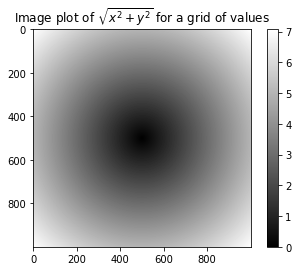

In [137]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

### Expressing Conditional Logic as Array Operations

In [138]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in
cond is True, and otherwise take the value from yarr. A list comprehension doing
this might look like:

In [139]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all
the work is being done in interpreted Python code). Second, it will not work with
multidimensional arrays. With np.where you can write this very concisely:

In [140]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to np.where don’t need to be arrays; one or both of
them can be scalars. A typical use of where in data analysis is to produce a new array
of values based on another array. Suppose you had a matrix of randomly generated
data and you wanted to replace all positive values with 2 and all negative values with
–2. This is very easy to do with np.where:


In [141]:
arr = np.random.randn(4, 4)
arr

array([[-1.31880712, -0.36921441, -0.05077476,  1.10603421],
       [-0.3976812 ,  0.8663533 , -0.71805913,  1.0924815 ],
       [-0.09713652,  0.45718402, -0.47217444,  0.35524073],
       [-0.09453515,  1.67529429,  1.27244883, -0.73547484]])

In [142]:
np.where(arr > 0, 2, -2)

array([[-2, -2, -2,  2],
       [-2,  2, -2,  2],
       [-2,  2, -2,  2],
       [-2,  2,  2, -2]])

In [143]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.31880712, -0.36921441, -0.05077476,  2.        ],
       [-0.3976812 ,  2.        , -0.71805913,  2.        ],
       [-0.09713652,  2.        , -0.47217444,  2.        ],
       [-0.09453515,  2.        ,  2.        , -0.73547484]])

The arrays passed to np.where can be more than just equal-sized arrays or scalars.

## Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about
the data along an axis are accessible as methods of the array class. You can use aggregations (often called reductions) like sum, mean, and std (standard deviation) either by
calling the array instance method or using the top-level NumPy function.

In [144]:
 arr = np.random.randn(5, 4)

In [145]:
arr.mean()


0.043740029951084204

In [146]:
np.mean(arr)

0.043740029951084204

In [147]:
arr.sum()

0.874800599021684

Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:

In [148]:
arr.mean(axis=1)

array([ 1.00924708,  0.03519826,  0.28520603, -0.64824481, -0.4627064 ])

In [149]:
arr.sum(axis=0)

array([ 1.39692033, -0.47274936,  0.74012725, -0.78949761])

Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0)
means “compute sum down the rows.”

Other methods like cumsum and cumprod do not aggregate, instead producing an array
of the intermediate results:

In [150]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [2]:
import numpy as np
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [3]:
arr.cumsum(axis=0)


array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [153]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [154]:
# Method --> Description
# sum --> Sum of all the elements in the array or along an axis; zero-length arrays have sum 0
# mean --> Arithmetic mean; zero-length arrays have NaN mean
# std, var --> Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n)
# min, max --> Minimum and maximum
# argmin, argmax --> Indices of minimum and maximum elements, respectively
# cumsum --> Cumulative sum of elements starting from 0
# cumprod --> Cumulative product of elements starting from 1

### Methods for Boolean Arrays

In [155]:
arr = np.random.randn(100)

In [156]:
(arr > 0).sum() # Number of positive values

51

There are two additional methods, any and all, useful especially for boolean arrays.
any tests whether one or more values in an array is True, while all checks if every
value is True:


In [157]:
bools = np.array([False, False, True, False])

In [158]:
bools.any()

True

In [159]:
bools.all()


False

These methods also work with non-boolean arrays, where non-zero elements evaluate to True.


## Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort
method:

In [160]:
arr = np.random.randn(6)

In [161]:
arr


array([-1.25740119,  0.2507437 ,  0.33802963, -1.20470483,  0.03849978,
        1.29035062])

In [162]:
arr.sort()

In [163]:
arr

array([-1.25740119, -1.20470483,  0.03849978,  0.2507437 ,  0.33802963,
        1.29035062])

You can sort each one-dimensional section of values in a multidimensional array inplace along an axis by passing the axis number to sort:

In [164]:
arr = np.random.randn(5, 3)
arr

array([[-0.71689332,  2.11460371,  0.59174918],
       [-0.39111725, -0.3243144 , -1.45814263],
       [ 0.40193498,  0.19483244,  2.35286637],
       [-0.99189503, -1.99256189,  0.02456943],
       [ 0.2806713 , -0.89730573, -0.12910139]])

In [165]:
 arr.sort(1)

In [167]:
arr

array([[-0.71689332,  0.59174918,  2.11460371],
       [-1.45814263, -0.39111725, -0.3243144 ],
       [ 0.19483244,  0.40193498,  2.35286637],
       [-1.99256189, -0.99189503,  0.02456943],
       [-0.89730573, -0.12910139,  0.2806713 ]])

The top-level method np.sort returns a sorted copy of an array instead of modifying
the array in-place. A quick-and-dirty way to compute the quantiles of an array is to
sort it and select the value at a particular rank:


In [168]:
large_arr = np.random.randn(1000)

In [169]:
large_arr.sort()

In [170]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6639933384518968

### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly
used one is np.unique, which returns the sorted unique values in an array:

In [171]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [172]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Contrast np.unique with the pure Python alternative:

In [173]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Another function, np.in1d, tests membership of the values in one array in another,
returning a boolean array:

In [174]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6]) # check values 2,3 and 6 in values array and returns true if any of the 2,3,6 found

array([ True, False, False,  True,  True, False,  True])

In [175]:
# Method --> Description
# unique(x) --> Compute the sorted, unique elements in x
# intersect1d(x, y) --> Compute the sorted, common elements in x and y
# union1d(x, y) --> Compute the sorted union of elements
# in1d(x, y) --> Compute a boolean array indicating whether each element of x is contained in y
# setdiff1d(x, y) --> Set difference, elements in x that are not in y
# setxor1d(x, y) --> Set symmetric differences; elements that are in either of the arrays, but not both

## 4.4 File Input and Output with Arrays

NumPy is able to save and load data to and from disk either in text or binary format.
In this section I only discuss NumPy’s built-in binary format, since most users will
prefer pandas and other tools for loading text or tabular data (see Chapter 6 for much
more).

np.save and np.load are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary
format with file extension .npy:

In [176]:
arr = np.arange(10)
np.save('some_array', arr)

If the file path does not already end in .npy, the extension will be appended. The array
on disk can then be loaded with np.load:

In [177]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You save multiple arrays in an uncompressed archive using np.savez and passing the
arrays as keyword arguments:


In [178]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an .npz file, you get back a dict-like object that loads the individual
arrays lazily:

In [179]:
arch = np.load('array_archive.npz')

In [180]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [181]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 4.5 Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other
square matrix math, is an important part of any array library. Unlike some languages
like MATLAB, multiplying two two-dimensional arrays with * is an element-wise
product instead of a matrix dot product. Thus, there is a function dot, both an array
method and a function in the numpy namespace, for matrix multiplication:

In [182]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [183]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [184]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [185]:
 x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y) is equivalent to np.dot(x, y):

In [186]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized onedimensional array results in a one-dimensional array:


In [187]:
np.dot(x, np.ones(3))

array([ 6., 15.])

The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix
multiplication:

In [188]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse
and determinant. These are implemented under the hood via the same industry standard linear algebra libraries used in other languages like MATLAB and R, such as
BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel
MKL (Math Kernel Library):

In [189]:
from numpy.linalg import inv, qr

In [190]:
X = np.random.randn(5, 5)

In [191]:
mat = X.T.dot(X)

In [192]:
inv(mat)

array([[ 7.61907511e+00, -4.21947543e+00,  2.39057588e+00,
        -3.78434662e-03, -3.74547793e+00],
       [-4.21947543e+00,  9.82462829e+00,  8.97143911e-01,
         1.08193036e+00,  3.57990478e+00],
       [ 2.39057588e+00,  8.97143911e-01,  2.20969122e+00,
         3.21222970e-01, -9.45160462e-01],
       [-3.78434662e-03,  1.08193036e+00,  3.21222970e-01,
         2.90385590e-01,  1.58485456e-01],
       [-3.74547793e+00,  3.57990478e+00, -9.45160462e-01,
         1.58485456e-01,  2.28229671e+00]])

In [193]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  3.73661635e-15, -1.41958121e-15,
        -8.64865673e-17,  3.70444385e-15],
       [-6.79932646e-16,  1.00000000e+00,  1.84683740e-16,
         1.37753326e-16, -8.84036038e-16],
       [-1.13598117e-15,  7.71103594e-16,  1.00000000e+00,
        -5.80847899e-16,  1.39605144e-15],
       [-1.11954085e-15, -4.25241890e-15, -1.01455147e-15,
         1.00000000e+00,  9.89088501e-16],
       [-6.94922548e-16,  3.94807787e-15, -9.53904279e-16,
        -9.08657885e-17,  1.00000000e+00]])

In [194]:
 q, r = qr(mat)

In [195]:
r

array([[ -4.63118459,   7.9426046 ,  -5.98794414, -11.88602069,
        -22.09859517],
       [  0.        ,  -2.7493226 ,   2.19003285,   7.61387585,
          4.6137142 ],
       [  0.        ,   0.        ,  -1.31100566,   4.10463887,
         -0.89200966],
       [  0.        ,   0.        ,   0.        ,  -1.05408889,
          0.12760671],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.17415249]])

In [196]:
# diag --> Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal
# dot --> Matrix multiplication
# trace --> Compute the sum of the diagonal elements
# det --> Compute the matrix determinant
# eig  --> Compute the eigenvalues and eigenvectors of a square matrix
# inv --> Compute the inverse of a square matrix
# pinv --> Compute the Moore-Penrose pseudo-inverse of a matrix
# qr --> Compute the QR decomposition
# svd --> Compute the singular value decomposition (SVD)
# solve --> Solve the linear system Ax = b for x, where A is a square matrix
# lstsq --> Compute the least-squares solution to Ax = b

## 4.6 Pseudorandom Number Generation

The numpy.random module supplements the built-in Python random with functions
for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard
normal distribution using normal:

In [197]:
samples = np.random.normal(size=(4, 4))

In [198]:
samples

array([[-2.52763097, -0.37411708, -0.27874646,  0.50925662],
       [-1.66057591, -0.76806299,  0.03594135, -0.79818635],
       [-1.1415831 , -0.33461433,  0.19302047,  0.37072906],
       [ 0.46073499, -0.51677521, -0.71010223, -0.13327747]])

Python’s built-in random module, by contrast, only samples one value at a time. As
you can see from this benchmark, numpy.random is well over an order of magnitude
faster for generating very large samples:

In [199]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

752 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [201]:
%timeit np.random.normal(size=N)

23.6 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We say that these are pseudorandom numbers because they are generated by an algorithm with deterministic behavior based on the seed of the random number generator. You can change NumPy’s random number generation seed using
np.random.seed:

In [202]:
np.random.seed(1234)

The data generation functions in numpy.random use a global random seed. To avoid
global state, you can use numpy.random.RandomState to create a random number
generator isolated from others:

In [203]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [204]:
# seed --> Seed the random number generator
# permutation --> Return a random permutation of a sequence, or return a permuted range
# shuffle --> Randomly permute a sequence in-place
# rand --> Draw samples from a uniform distribution
# randint --> Draw random integers from a given low-to-high range
# randn --> Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface)
# binomial --> Draw samples from a binomial distribution
# normal --> Draw samples from a normal (Gaussian) distribution
# beta --> Draw samples from a beta distribution
# chisquare --> Draw samples from a chi-square distribution
# gamma --> Draw samples from a gamma distribution
# uniform --> Draw samples from a uniform [0, 1) distribution

## 4.7 Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array
operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability

Here is a pure Python way to implement a single random walk with 1,000 steps using
the built-in random module:

In [206]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plot of the first 100 values on one of these random walks:

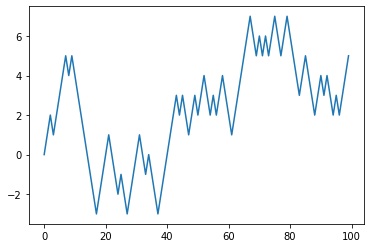

In [207]:
plt.plot(walk[:100])

You might make the observation that walk is simply the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the np.random
module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the
cumulative sum:

In [208]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value
along the walk’s trajectory

In [209]:
walk.min()

-9

In [210]:
walk.max()

60

A more complicated statistic is the first crossing time, the step at which the random
walk reaches a particular value. Here we might want to know how long it took the
random walk to get at least 10 steps away from the origin 0 in either direction.
np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached
or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can com‐
pute this using argmax, which returns the first index of the maximum value in the
boolean array (True is the maximum value):

In [211]:
(np.abs(walk) >= 10).argmax()

297

Note that using argmax here is not always efficient because it always makes a full scan
of the array. In this special case, once a True is observed we know it to be the maximum value

### Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say 5,000 of them, you can generate
all of the random walks with minor modifications to the preceding code. If passed a
2-tuple, the numpy.random functions will generate a two-dimensional array of draws,
and we can compute the cumulative sum across the rows to compute all 5,000 random walks in one shot:

In [212]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

Now, we can compute the maximum and minimum values obtained over all of the
walks:

In [213]:
walks.max()

122

In [214]:
walks.min()


-128

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is
slightly tricky because not all 5,000 of them reach 30. We can check this using the any
method:

In [215]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [216]:
hits30.sum() # Number that hit 30 or -30

3368

We can use this boolean array to select out the rows of walks that actually cross the
absolute 30 level and call argmax across axis 1 to get the crossing times:

In [217]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787

Feel free to experiment with other distributions for the steps other than equal-sized
coin flips. You need only use a different random number generation function, like
normal to generate normally distributed steps with some mean and standard
deviation:

In [218]:
steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))